In [36]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division ,print_function

import sys
import os

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

import matplotlib.pylab as plt
import seaborn as sns

pd.set_option('display.float_format',lambda x: '%.5f'%x)
np.set_printoptions(precision=5,suppress=True)

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

sns.set(style='ticks',context='poster')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
#Sentiment=pd.Series(np.random.randn(600),index=pd.date_range('1/1/2016',freq='D',periods=600))

In [38]:
Sentiment=pd.read_csv(r'C:\Users\Ordinary\Desktop\sentiment.csv',index_col=0
                      ,parse_dates=[0])
Sentiment.head(100)

,UNCSENT
DATE,
2016-01-01,-0.15473
2016-01-02,-0.25446
2016-01-03,-0.11101
2016-01-04,-0.93369
2016-01-05,0.76727
2016-01-06,-1.98884
2016-01-07,0.49854
2016-01-08,1.56383
2016-01-09,-1.15363


In [39]:
sentiment_short=Sentiment

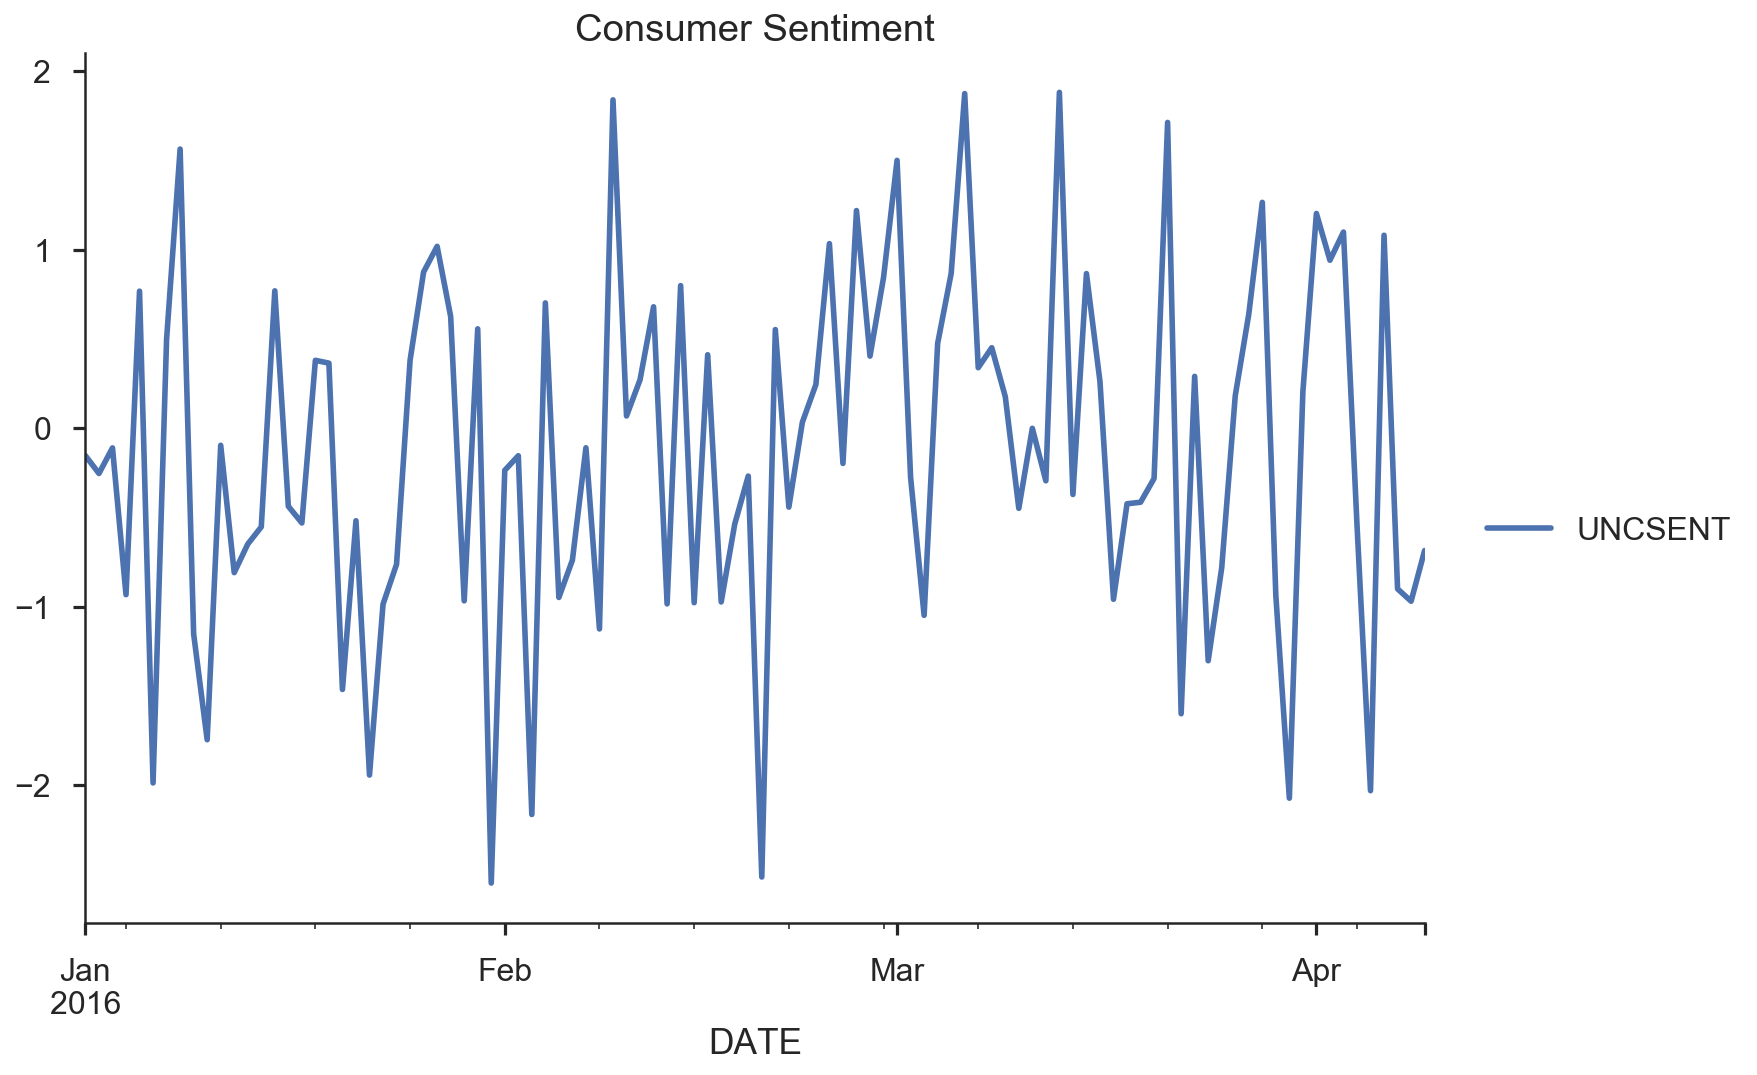

In [40]:
sentiment_short.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25,0.5))
plt.title('Consumer Sentiment')
sns.despine()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A64A0CCE80>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001A64A18CE80>], dtype=object)

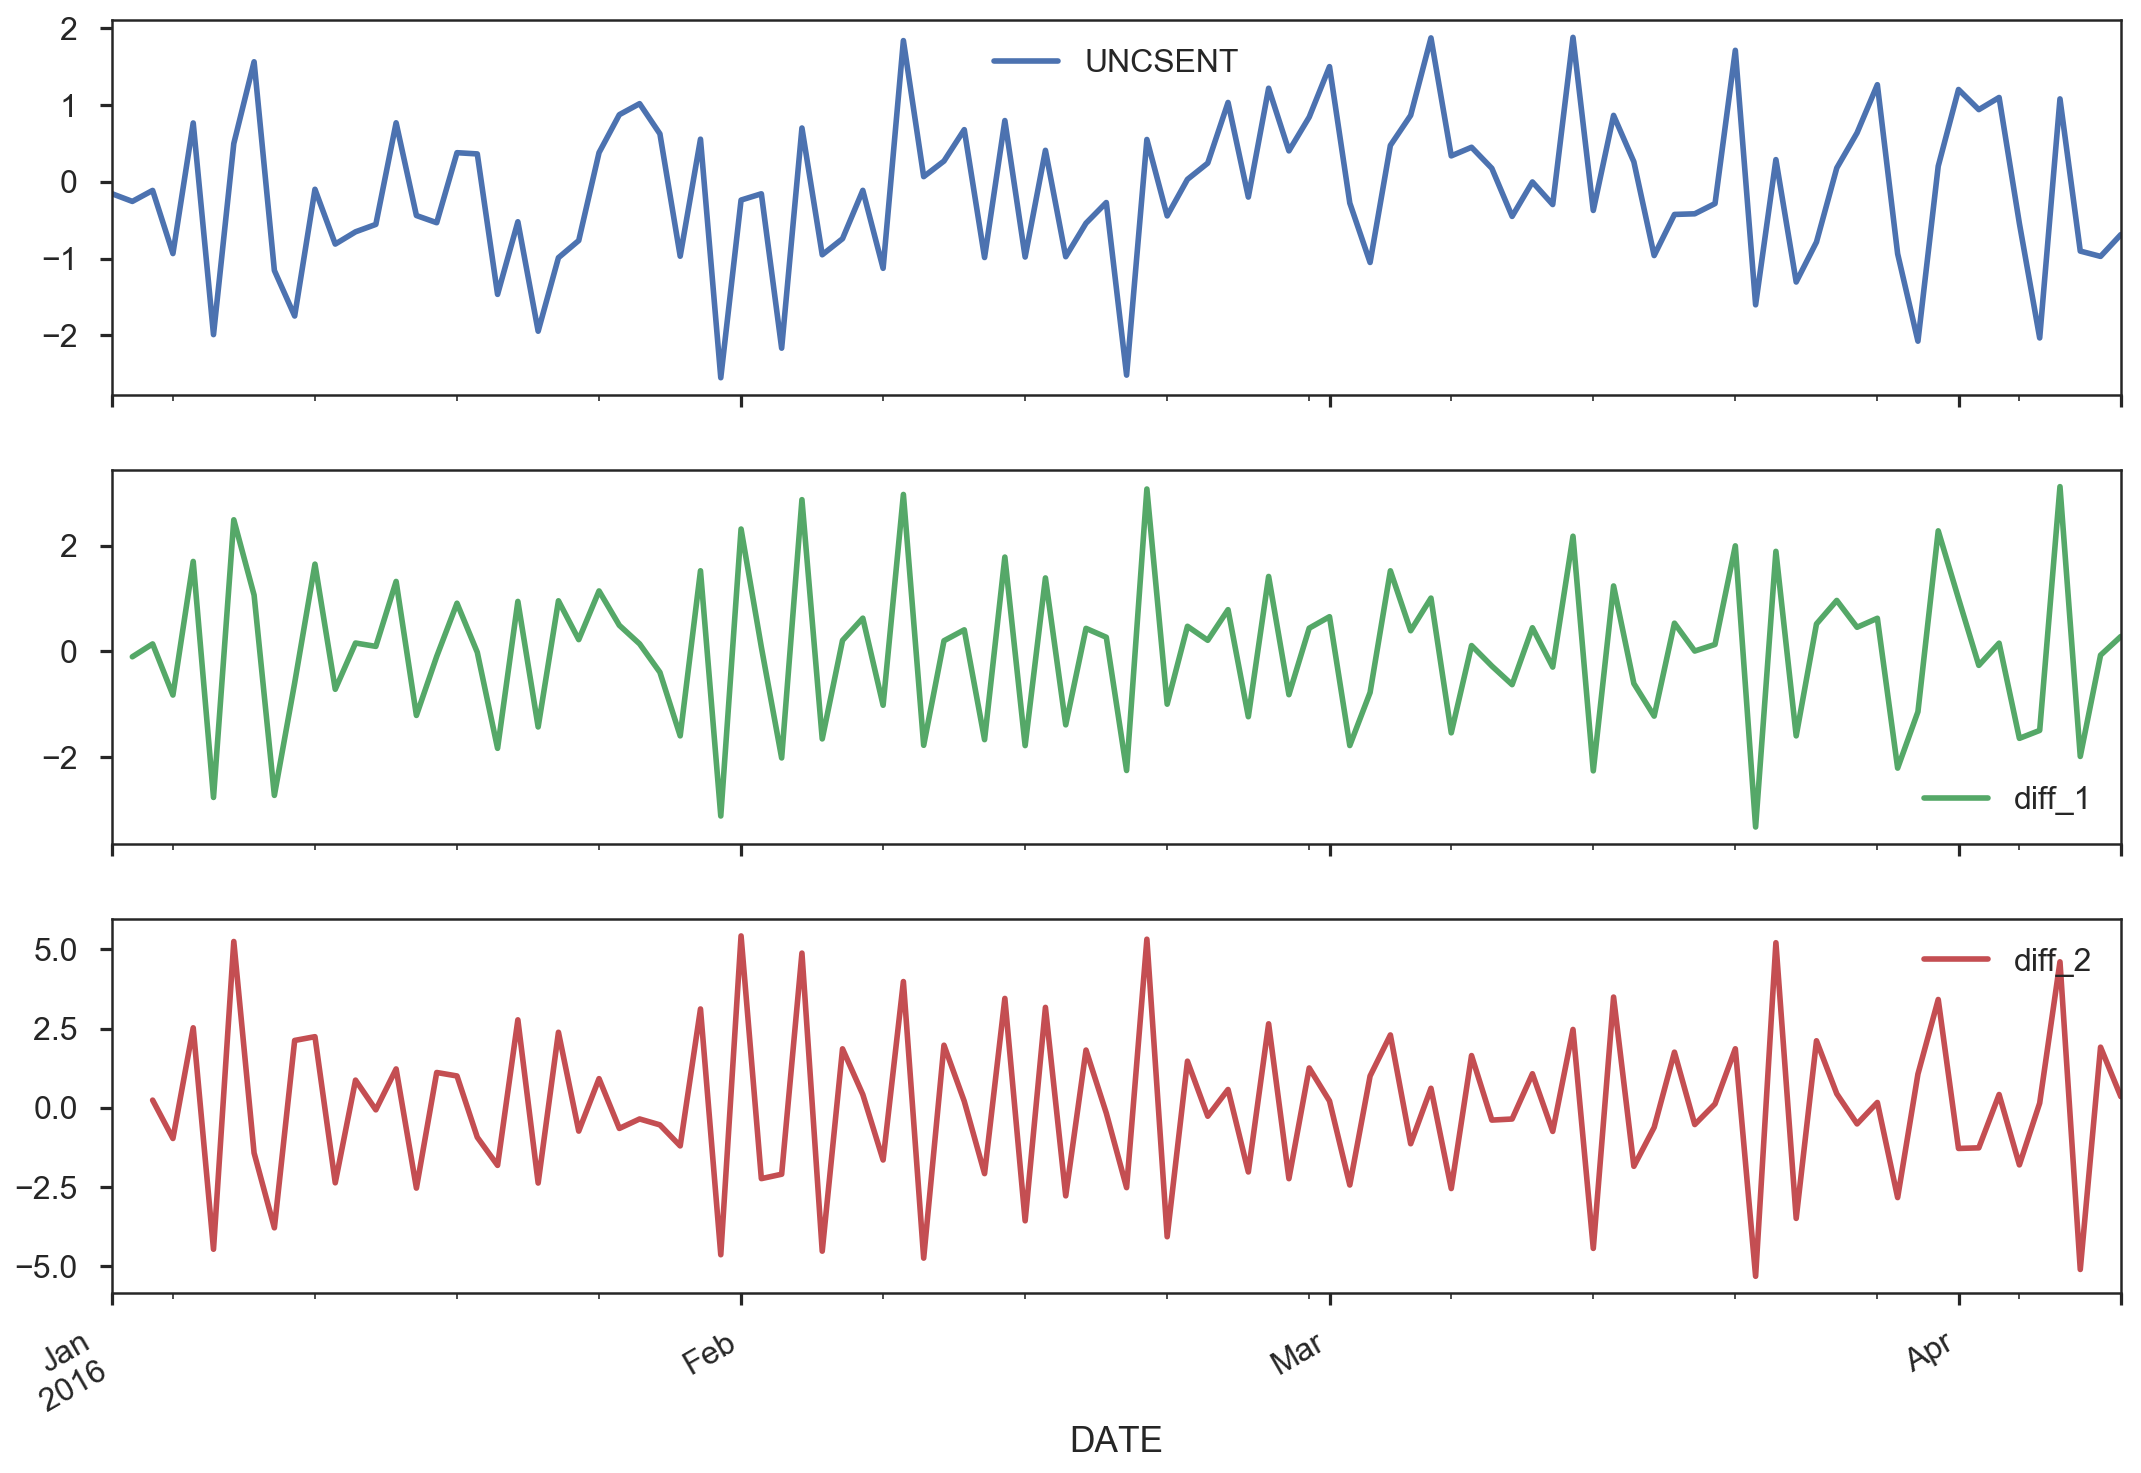

In [41]:
sentiment_short['diff_1']=sentiment_short['UNCSENT'].diff(1)
sentiment_short['diff_2']=sentiment_short['diff_1'].diff(1)
sentiment_short.plot(subplots=True,figsize=(18,13))

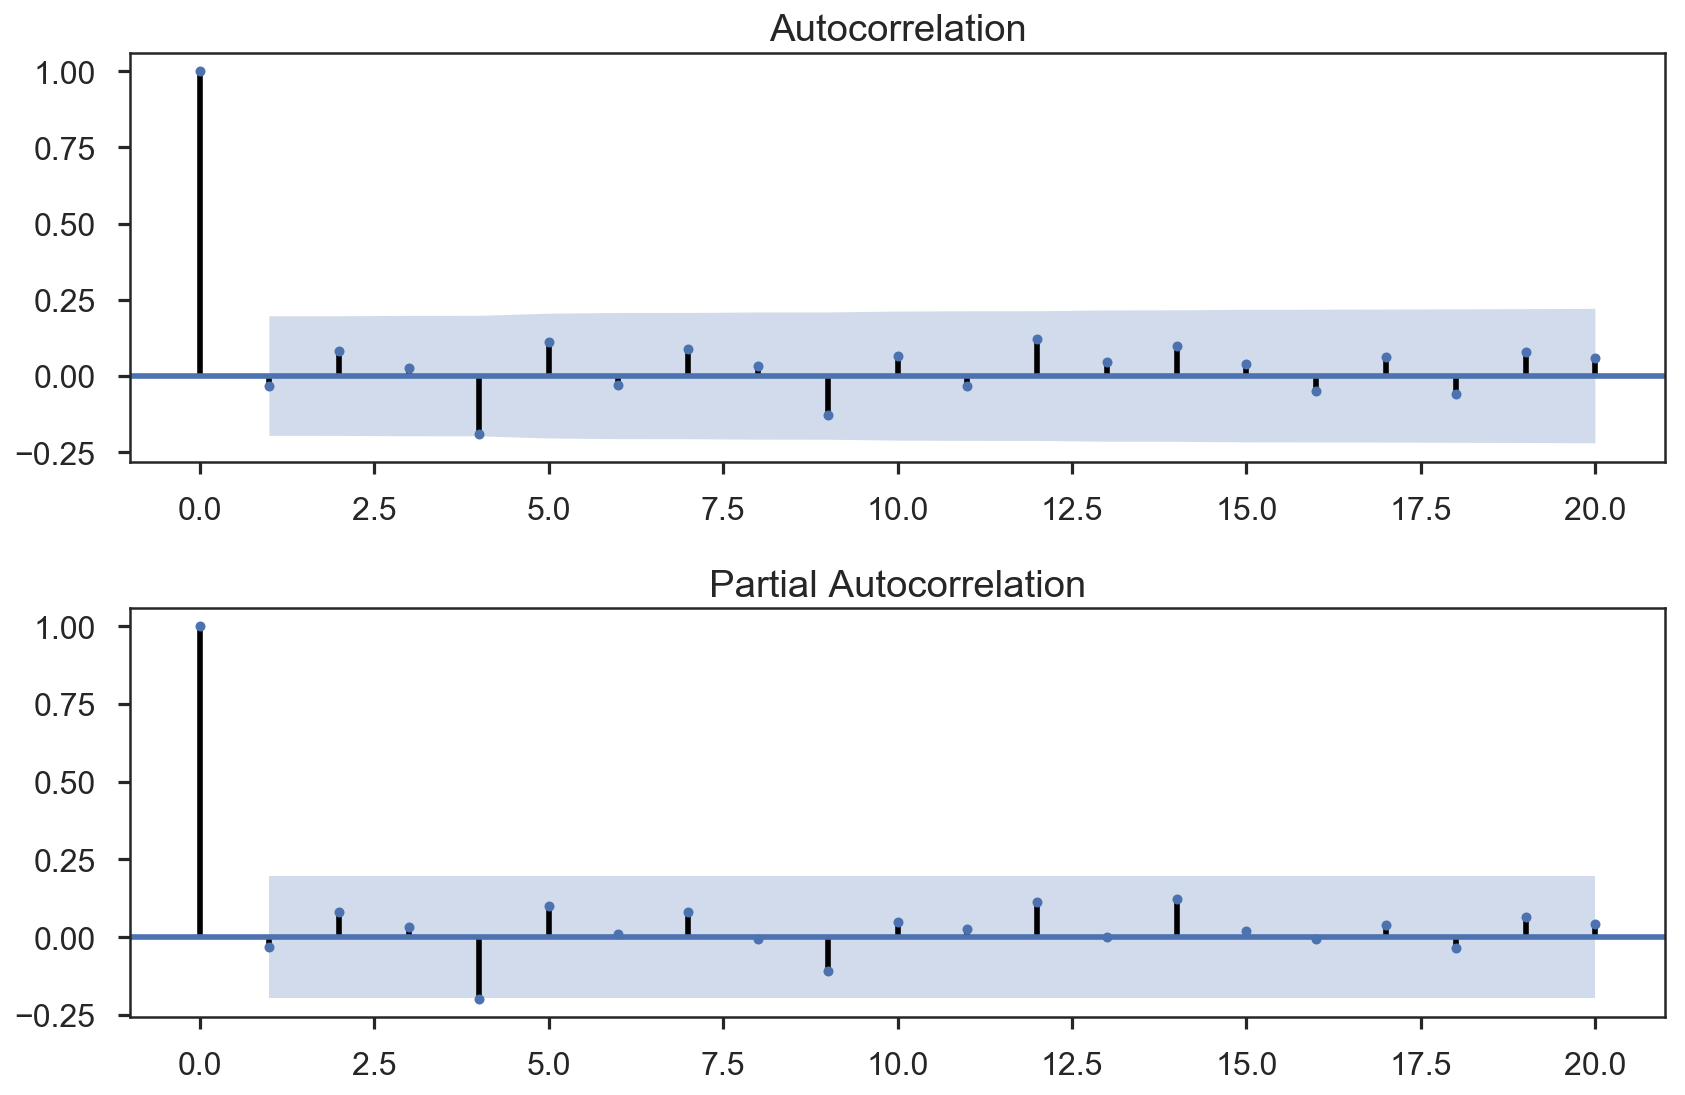

In [54]:
fig=plt.figure(figsize=(12,8))

#print(Sentiment)
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(sentiment_short['UNCSENT'],lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(sentiment_short['UNCSENT'],lags=20,ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()


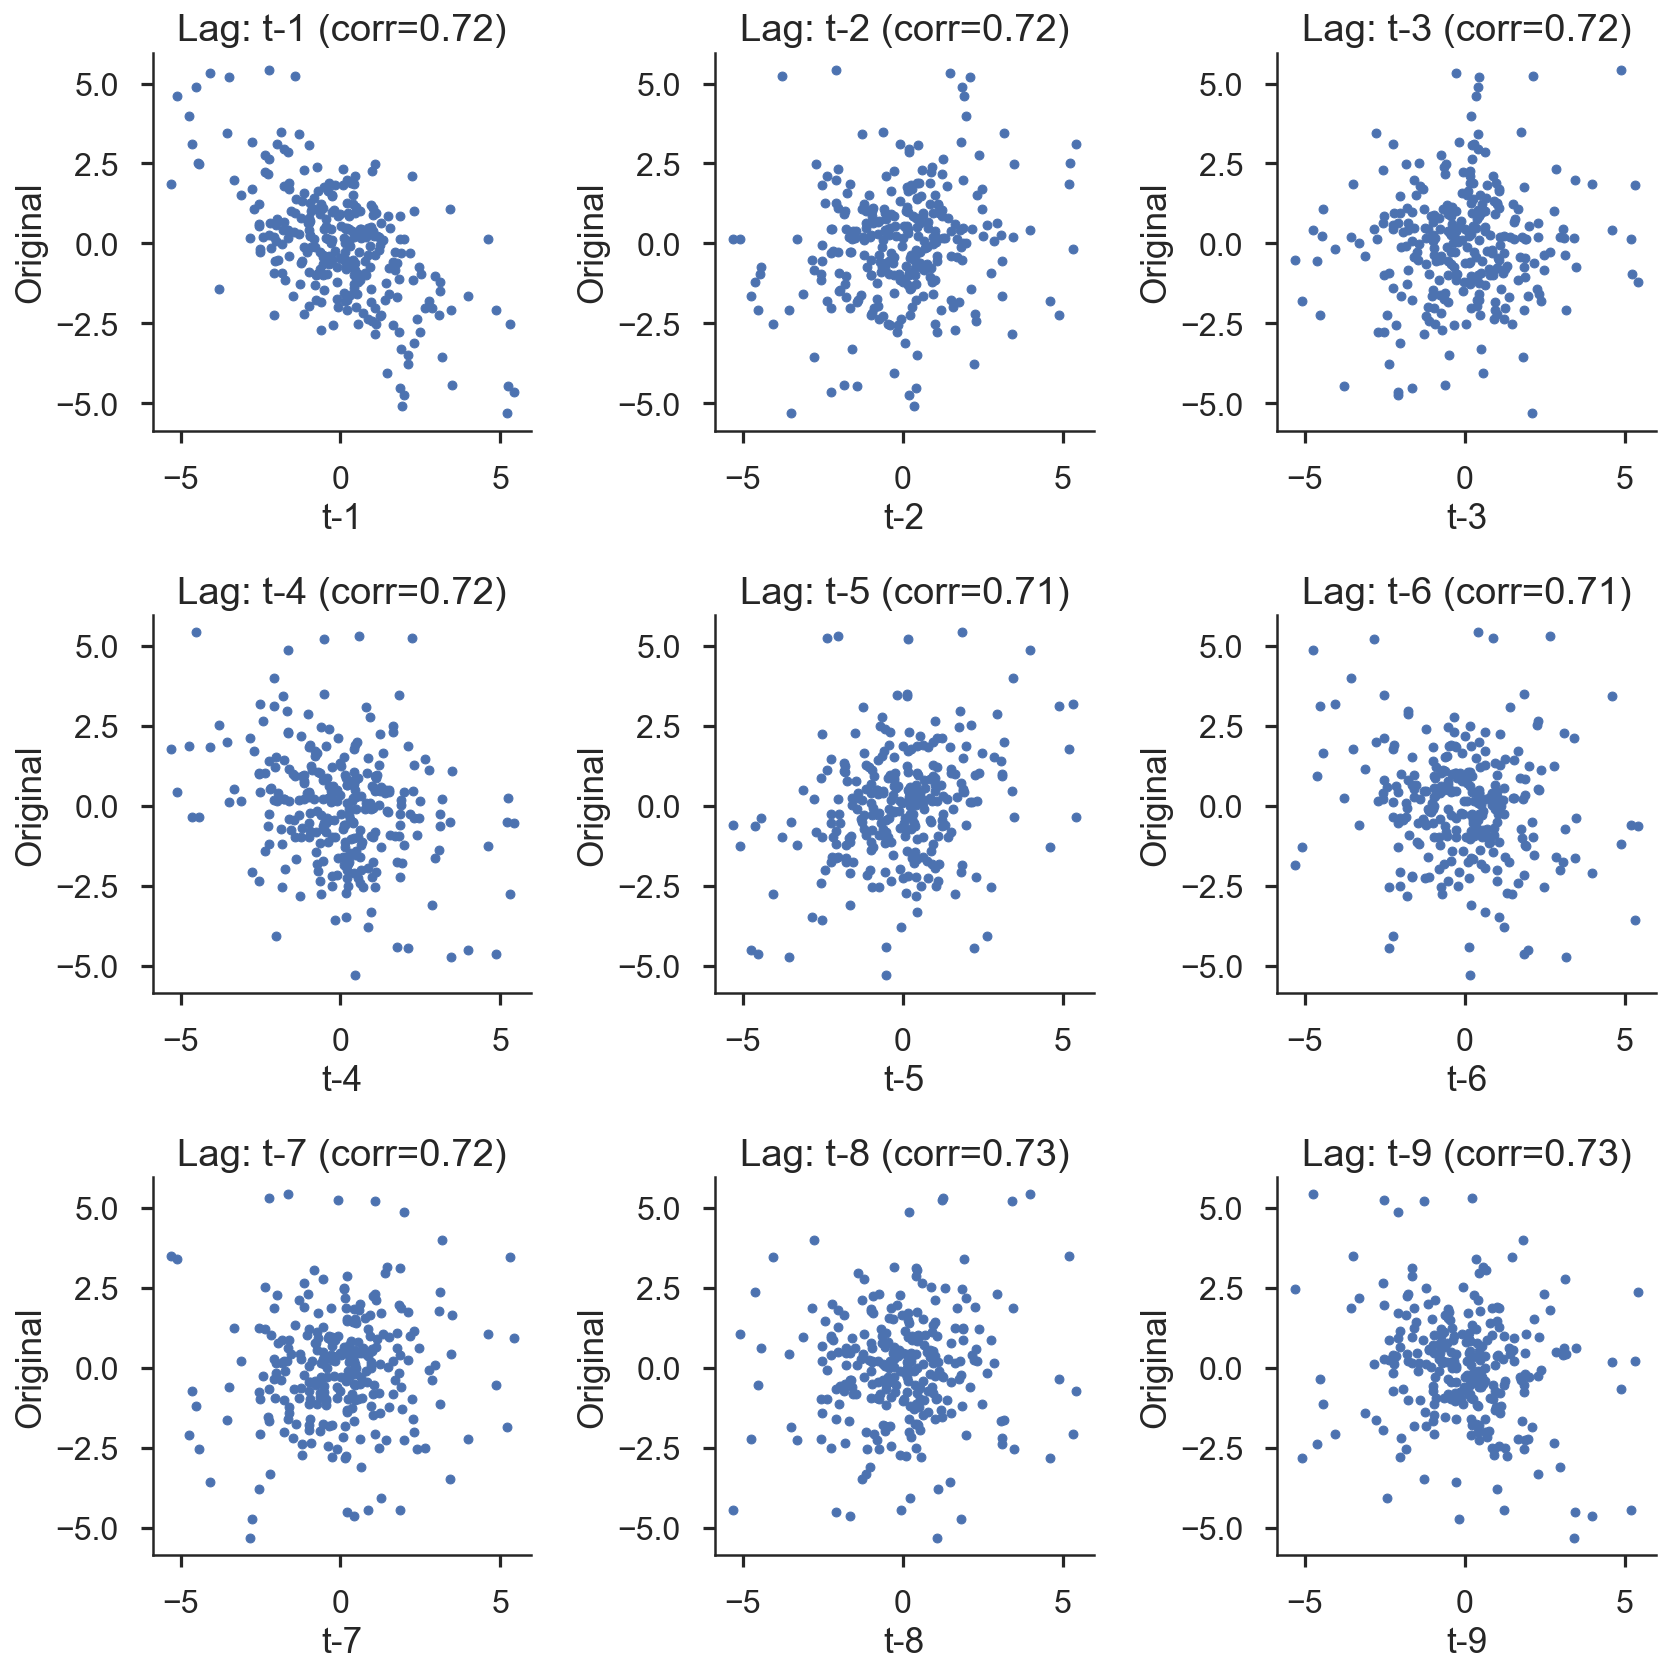

In [56]:
lags=9
ncols=3
nrows=int(np.ceil(lags/ncols))

fig,axes=plt.subplots(ncols=ncols,nrows=nrows,figsize=(4*ncols,4*nrows))

for ax,lag in zip(axes.flat,np.arange(1,lags+1,1)):
    lag_str='t-{}'.format(lag)
    X=(pd.concat([sentiment_short,sentiment_short.shift(-lag)],axis=1,
                keys=['y']+[lag_str]).dropna())
    X.plot(ax=ax,kind='scatter',y='y',x=lag_str)
    corr=X.corr().as_matrix()[0][1]
    ax.set_ylabel('Original')
    ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str,corr))
    ax.set_aspect('equal')
    sns.despine()
fig.tight_layout()

In [63]:
def tsplot(y,lags=None,title='',figsize=(14,8)):
    fig=plt.figure(figsize=figsize)
    layout=(2,2)
    ts_ax=plt.subplot2grid(layout,(0,0))
    hist_ax=plt.subplot2grid(layout,(0,1))
    acf_ax=plt.subplot2grid(layout,(1,0))
    pacf_ax=plt.subplot2grid(layout,(1,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax,kind='hist',bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y,lags=lags,ax=acf_ax)
    smt.graphics.plot_pacf(y,lags=lags,ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax,pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax,acf_ax,pacf_ax

(<matplotlib.axes._subplots.AxesSubplot at 0x1a649f69c88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a649dacd68>)

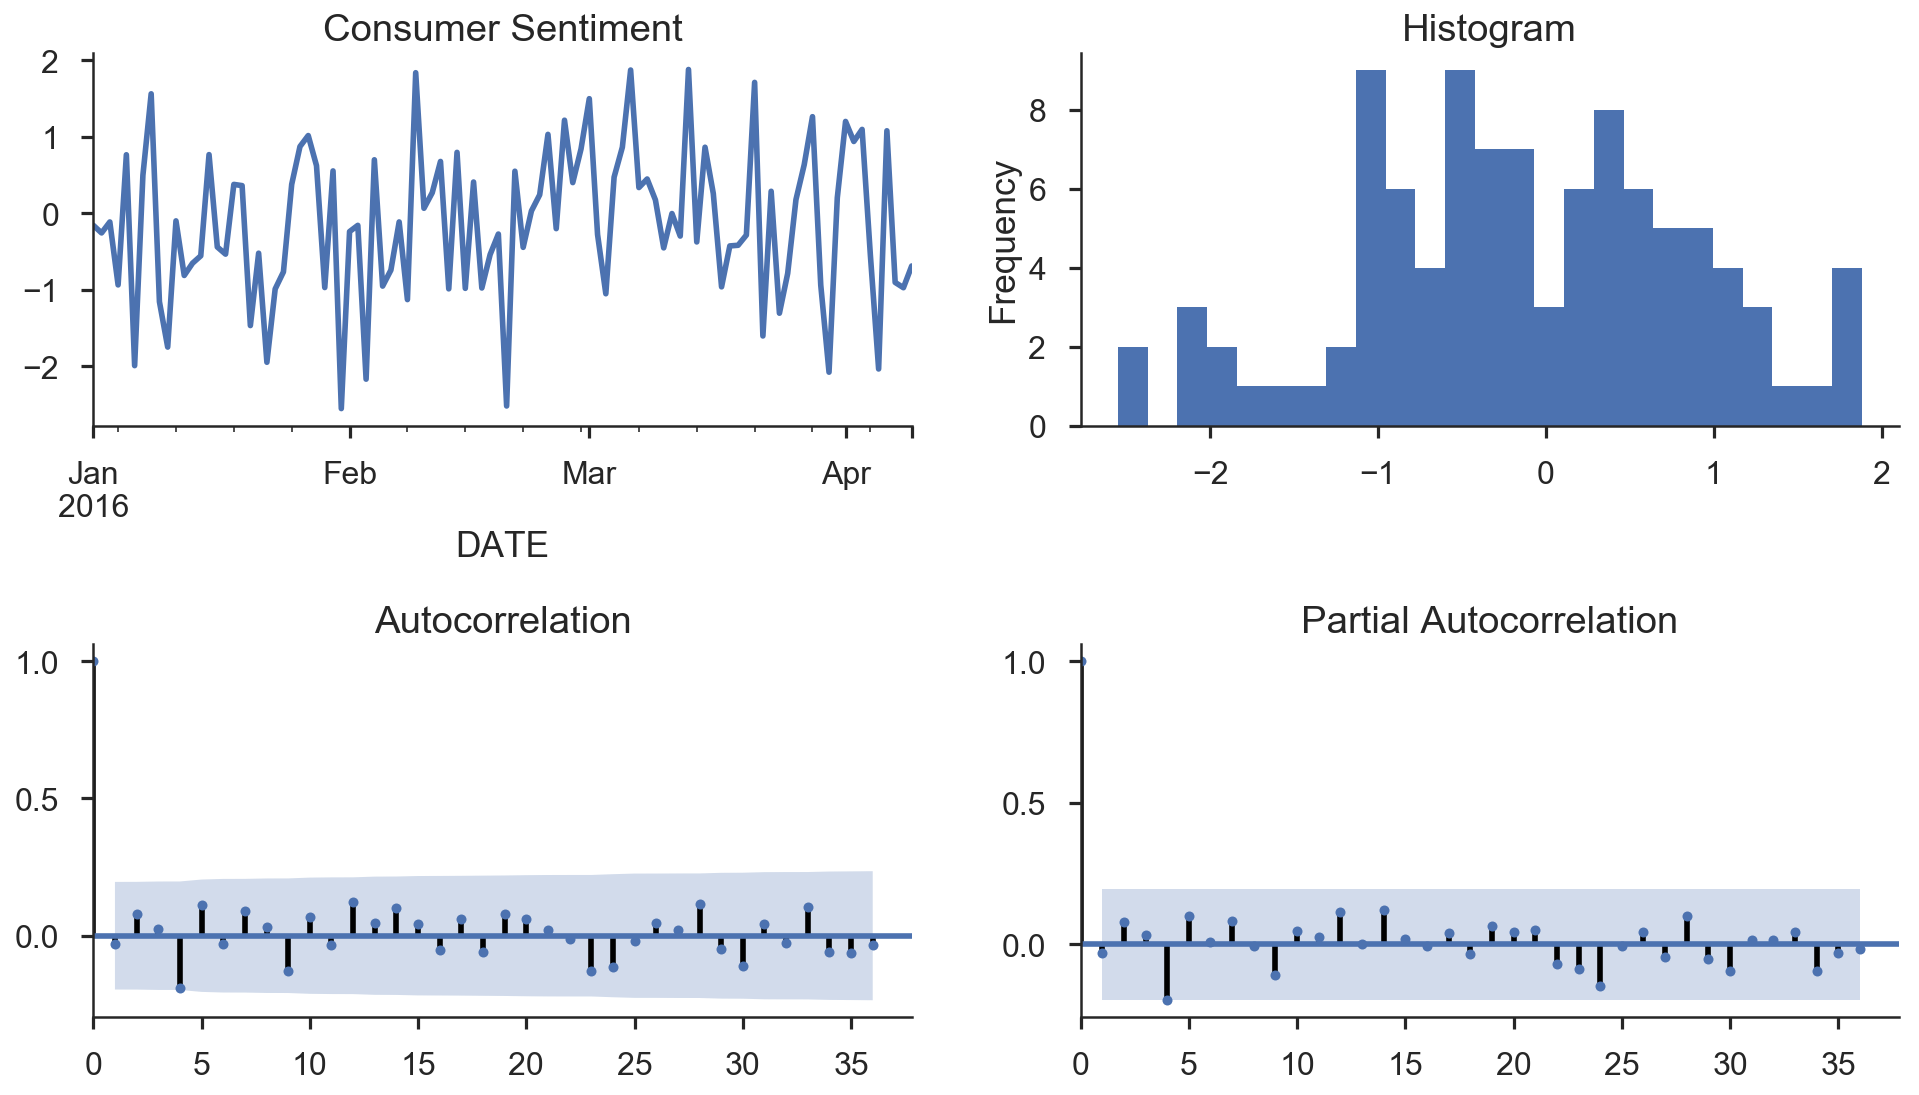

In [66]:
tsplot(sentiment_short['UNCSENT'],title='Consumer Sentiment',lags=36)